In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# One Feature

In [2]:
data = np.loadtxt('../Data/vardQ_.6f.csv',delimiter=',') # skip row for column names

In [3]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [10]:
x_train = data[:, 0][train_ind]
y_train = data[:, 1][train_ind]

x_test = data[:, 0][test_ind]
y_test = data[:, 1][test_ind]

x_stest = data[:, 0][secondary_ind]
y_stest = data[:, 1][secondary_ind]

regressor = RandomForestRegressor()
# regressor.fit(x_train.reshape(-1, 1),y_train)

In [33]:
# Create the random grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(5,350,50)], 
              'max_features': ['auto', 'sqrt'],
              'max_depth': np.concatenate(([int(x) for x in np.linspace(5, 20, 5)], [None])),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             } 
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 250, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train.reshape(-1, 1),y_train)

[3.334454 3.156549 3.031004 2.939519 2.896526 2.856729 2.932981 2.896526
 2.747412 3.007321 2.939519 2.934498 2.850646 2.863917 2.870404 2.847573
 2.790285 2.984977 2.846337 2.789581 2.477121 2.641474 2.647383 2.708421
 2.678518 2.683947 2.693727 2.663701 2.689309 2.721811 2.663701 2.670246
 2.697229 2.691965 2.716003 2.665581 2.679428 2.661813 2.632457 2.664642
 2.687529]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   n_estimators=68),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'max_depth': array([5, 8, 12, 16, 20, None], dtype=object),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimato

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   n_estimators=68),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'max_depth': array([5, 8, 12, 16, 20, None], dtype=object),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 12, 19, 26, 33, 40,
                                                         47, 54, 61, 68, 75, 82,
                                                         89, 96, 103, 110, 117,
                                                         124, 131, 138, 145,
                                                         152, 159, 166, 173,
                                

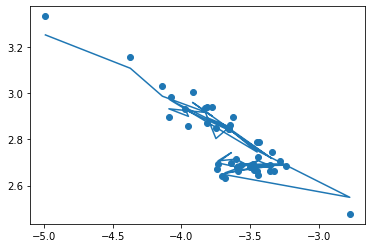

In [34]:
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))

In [35]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -0.008933881088455668
Best hyperparameters:  {'n_estimators': 82, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 8}


In [36]:
regressor = RandomForestRegressor(max_features=model.best_params_['max_features'],
                min_samples_leaf=model.best_params_['min_samples_leaf'], 
                min_samples_split = model.best_params_['min_samples_split'], 
                n_estimators=model.best_params_['n_estimators'])
regressor.fit(x_train.reshape(-1, 1),y_train)

RandomForestRegressor(n_estimators=82)

In [37]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test.reshape(-1,1)) - 10**y_test)**2))) 

RMSE:  158.2301873843011


In [38]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest.reshape(-1,1)) - 10**y_stest)**2)))

RMSE:  226.77140786901603


# Multiple features

In [39]:
data = np.loadtxt('../Data/features.csv',delimiter=',', skiprows=1) # skip row for column names

In [50]:
cycle_life = np.log10(data[:,0])
DeltaQ_logVar = data[:,1]
DeltaQ_Min = data[:, 2]
DeltaQ_Skew = data[:, 3]
DeltaQ_Kurt = data[:, 4]
QD_Max_2 = data[:, 5]
QD_2 = data[:, 6]
slope_capacity_fade_2_100 = data[:, 7]
intercept_capacity_fade_2_100 = data[:, 8]
slope_capacity_fade_91_100 = data[:, 9]
intercept_capacity_91_100 = data[:, 10]
init_avg_charge_time = data[:, 11]
avg_T = data[:, 12]
min_IR = data[:, 13]
IR_100_2 = data[:, 14]

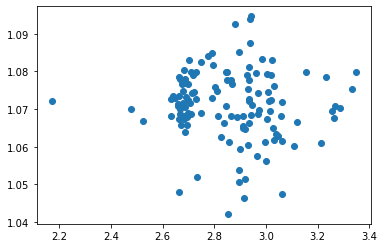

In [57]:
plt.scatter(cycle_life, QD_2)

In [64]:
X = np.array([DeltaQ_logVar, DeltaQ_Min, DeltaQ_Skew, DeltaQ_Kurt, QD_Max_2, QD_2]).transpose()

x_train = X[train_ind]
y_train = cycle_life[train_ind]

x_test = X[test_ind]
y_test = cycle_life[test_ind]

x_stest = X[secondary_ind]
y_stest = cycle_life[secondary_ind]

print(np.average(X[:,0]))

-3.8331870629274194


In [ ]:
# Create the random grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(5,1000,100)], 
              'max_features': ['auto', 'sqrt'],
              'max_depth': [5,6,7,8,9,10, 11,12,13,14,15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             } 
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 100, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(min_samples_leaf=2,
                                                   n_estimators=969),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf':

In [113]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -0.009074052677658682
Best hyperparameters:  {'n_estimators': 969, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}


In [114]:
regressor = RandomForestRegressor(max_features=model.best_params_['max_features'],
                min_samples_leaf=model.best_params_['min_samples_leaf'], 
                min_samples_split = model.best_params_['min_samples_split'], 
                n_estimators=model.best_params_['n_estimators'])
regressor.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=969)

In [115]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test) - 10**y_test)**2))) 


RMSE:  188.67479887283994


In [116]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest) - 10**y_stest)**2))) 


RMSE:  215.1651089452194
